# Assignment 3- Data Manipulation with Base R

This assignment deals with cleaning data to get rid of missing values and creating new variables that can be used later for analysis. This is done using the "titanic" data set. 

### Upload data set and change variable types

In [1]:
setwd("~/Data Analysis Practice Data Sets/Titanic Practice")
getwd()
titanic <- read.csv("train.csv")
titanic$Survived = factor(titanic$Survived)
titanic$Pclass = factor(titanic$Pclass)

[1] "C:/Users/student/Documents/Data Analysis Practice Data Sets/Titanic Practice"

### 1.) Check for missing data

In [2]:
#Total missing values in titanic data set:
sum(is.na(titanic))

#Total missing values in the Age column:
sum(is.na(titanic$Age))

[1] 177

[1] 177

### 2.) Replace missing numeric values with variable average

In [3]:
titanic[is.na(titanic$Age),]$Age = mean(titanic$Age, na.rm=TRUE)

### 3 & 4.) Remove rows with missing categorical data and delete unnecessary columns

In [6]:
titanic$Cabin = NULL
titanic$Name = NULL
titanic$PassengerId = NULL
titanic$Ticket = NULL
titanic_clean = titanic[!titanic$Embarked == "", ]
titanic_clean = titanic_clean[complete.cases(titanic_clean),]
titanic_clean[1:10,]

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.00000,1,0,7.2500,S
1,1,female,38.00000,1,0,71.2833,C
1,3,female,26.00000,0,0,7.9250,S
1,1,female,35.00000,1,0,53.1000,S
0,3,male,35.00000,0,0,8.0500,S
0,3,male,29.69912,0,0,8.4583,Q
0,1,male,54.00000,0,0,51.8625,S
0,3,male,2.00000,3,1,21.0750,S
1,3,female,27.00000,0,2,11.1333,S
1,2,female,14.00000,1,0,30.0708,C


### 5-12.) Descriptive statistics

In [7]:
#5. Mean age:
mean(titanic_clean$Age)

#6. Mean age of female passengers:
mean(titanic_clean[titanic_clean$Sex == "female", ]$Age)

#6. Median fare of passengers in class 1:
median(titanic_clean[titanic_clean$Pclass == "1",]$Fare)

#7. Median fare of passengers not in class 1:
median(titanic_clean[!titanic_clean$Pclass == "1",]$Fare)

#8. Median fare of the female passengers that are not in Class 1:
median(titanic_clean[((titanic_clean$Pclass != "1") & (titanic_clean$Sex == "female")),]$Fare)

#9. Median age of survived passengers who are female and Class 1 or Class 2:
median(titanic_clean[((titanic_clean$Sex == "female") & 
                      (titanic_clean$Pclass == "1") | (titanic_clean$Pclass == "2")),]$Age)

#10. Mean fare of female teenagers survived passengers:
mean(titanic_clean[((titanic_clean$Sex == "female") & 
                    (titanic_clean$Age <= 19) & 
                    (titanic_clean$Age >= 13) & 
                    (titanic_clean$Survived == "1")), ]$Fare)

#11. Mean fare of female teenagers who survived passengers for each class:
titanic_fs = titanic_clean[((titanic_clean$Sex == "female") & 
                            (titanic_clean$Survived == "1")),]
aggregate(titanic_fs[,"Fare"], by=titanic_fs[c("Pclass")], mean)
              
#12. Ratio of survivors for passengers who paid more than the average fare:
titanic_more = titanic_clean[(titanic_clean$Fare > mean(titanic_clean$Fare)),]
length(which(titanic_more$Survived == "1")) / (length(which(titanic_more$Survive == "0" | titanic_more$Survive == "1")))

[1] 29.65345

[1] 28.07709

[1] 58.6896

[1] 10.5

[1] 14.45625

[1] 29.84956

[1] 49.17966

Pclass,x
1,106.56194
2,22.28899
3,12.46453


[1] 0.5933014

### Adding Aditional Columns (questions 13, 18, & 17)

In [11]:
#13. Add column that standardizes the fare and name it sfare
titanic_clean$sfare = (titanic_clean$Fare - mean(titanic_clean$Fare)) / (sd(titanic_clean$Fare))

#17. Categorical variable named "cfare" that takes value "cheap" for passengers paying less the average fare and takes value "expensive" for passengers paying more than the average fare. 
titanic_clean$cfare[titanic_clean$Fare >= mean(titanic_clean$Fare)] = "expensive"
titanic_clean$cfare[titanic_clean$Fare <= mean(titanic_clean$Fare)] = "cheap"

#18. Add categorical variable named "cage" that takes value 0 for age 0-10, 1 for age 10-20, 2 for age 20-30, and so on
titanic_clean$cage[titanic_clean$Age < 10] = 0
titanic_clean$cage[titanic_clean$Age >= 10 & titanic_clean$Age < 20] = 1
titanic_clean$cage[titanic_clean$Age >= 20 & titanic_clean$Age < 30] = 2
titanic_clean$cage[titanic_clean$Age >= 30 & titanic_clean$Age < 40] = 3
titanic_clean$cage[titanic_clean$Age >= 40 & titanic_clean$Age < 50] = 4
titanic_clean$cage[titanic_clean$Age >= 50 & titanic_clean$Age < 60] = 5
titanic_clean$cage[titanic_clean$Age >= 60 & titanic_clean$Age < 70] = 6
titanic_clean$cage[titanic_clean$Age >= 70 & titanic_clean$Age < 80] = 7
titanic_clean$cage[titanic_clean$Age >= 80 & titanic_clean$Age < 90] = 8
titanic_clean[1:10,]


Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sfare,cfare,cage
0,3,male,22.00000,1,0,7.2500,S,-0.49995832,cheap,2
1,1,female,38.00000,1,0,71.2833,C,0.78850276,expensive,3
1,3,female,26.00000,0,0,7.9250,S,-0.48637615,cheap,2
1,1,female,35.00000,1,0,53.1000,S,0.42262322,expensive,3
0,3,male,35.00000,0,0,8.0500,S,-0.48386093,cheap,3
0,3,male,29.69912,0,0,8.4583,Q,-0.47564523,cheap,2
0,1,male,54.00000,0,0,51.8625,S,0.39772257,expensive,5
0,3,male,2.00000,3,1,21.0750,S,-0.22177534,cheap,0
1,3,female,27.00000,0,2,11.1333,S,-0.42181959,cheap,2
1,2,female,14.00000,1,0,30.0708,C,-0.04076424,cheap,1


### Graphs and Plots (questions 14-16, 19, & 20)

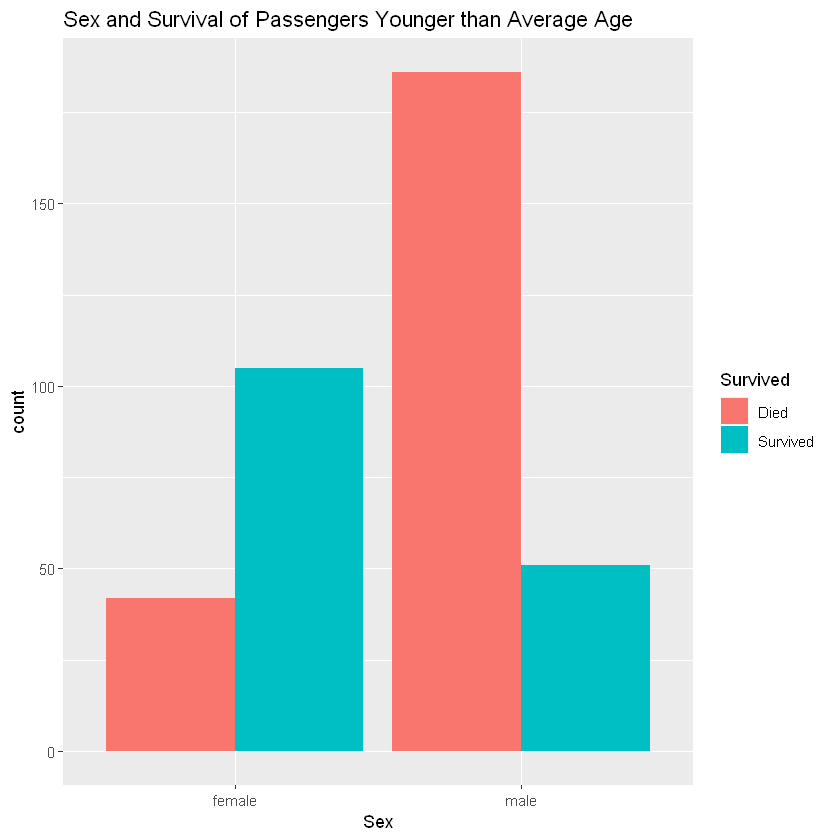

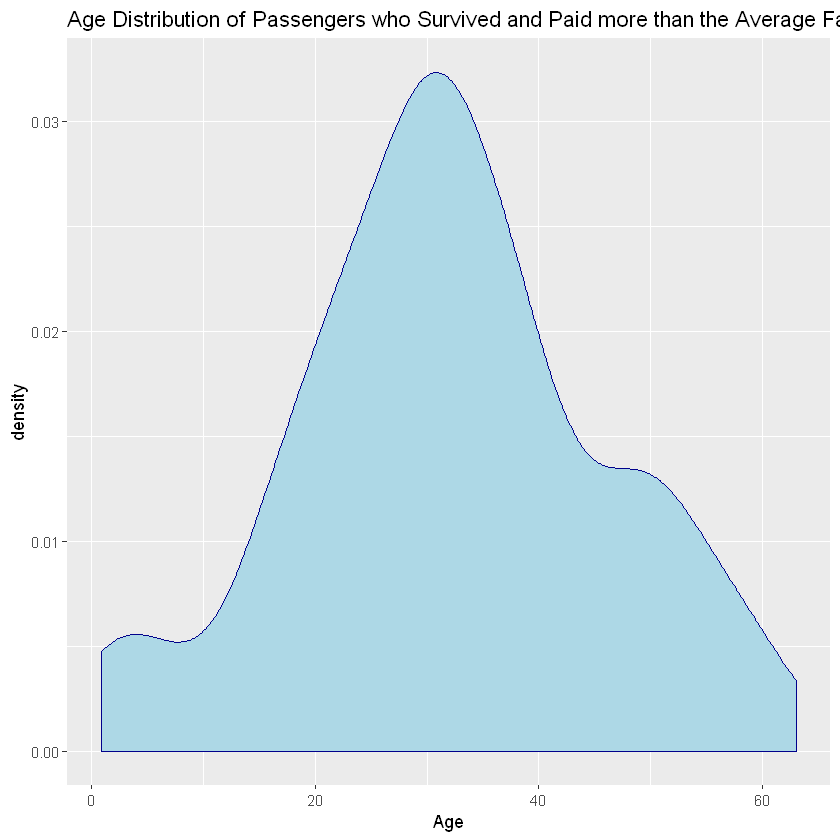

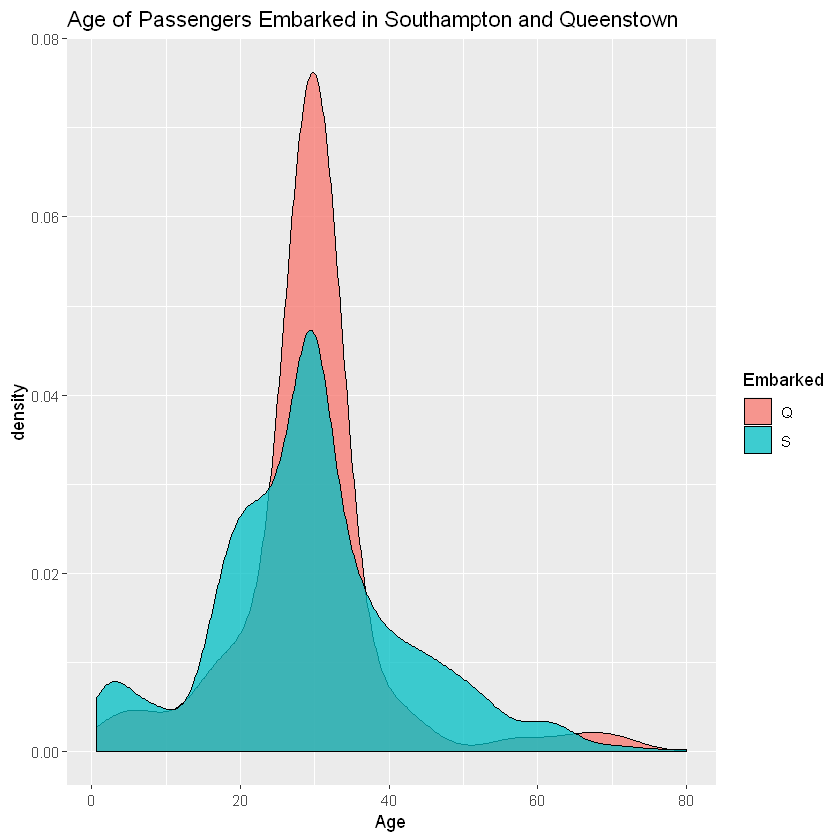

Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"

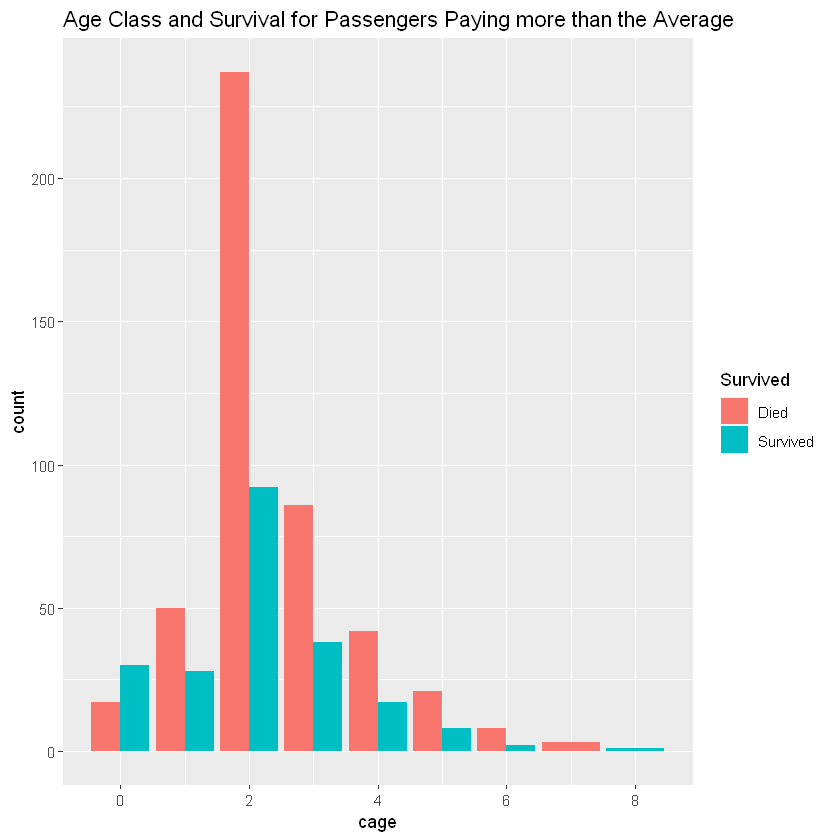

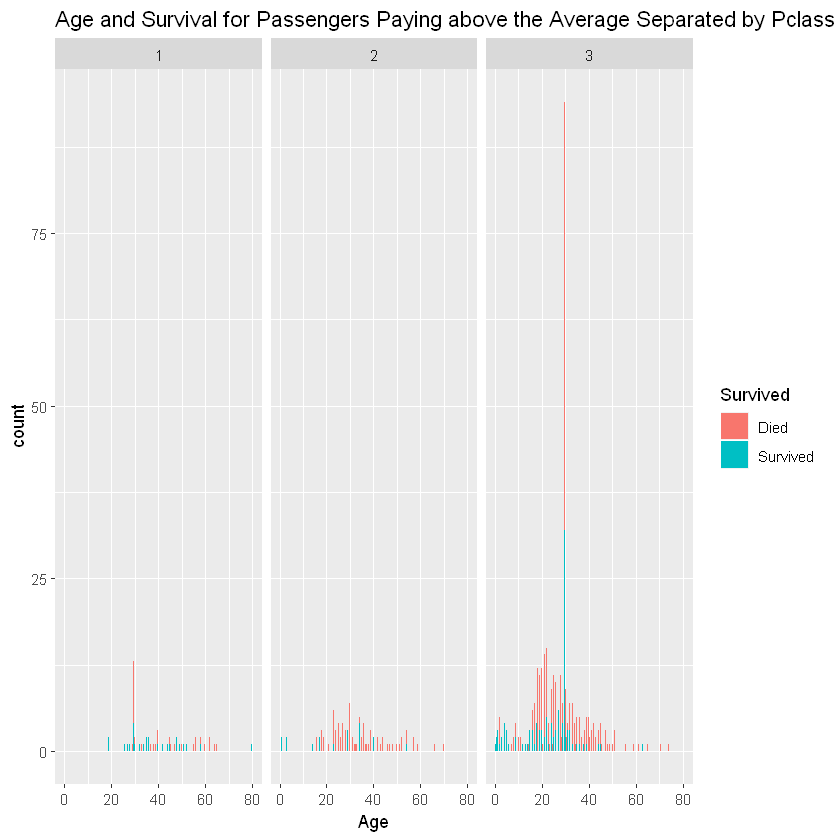

In [12]:
library(ggplot2)

#14. Bar chart of Sex and Survived for passengers younger than the average age
ggplot(titanic_clean[titanic_clean$Age < mean(titanic_clean$Age),]) +
  geom_bar(mapping = aes(x = Sex, fill = Survived), position = "dodge") +
  scale_fill_discrete(breaks=c("0", "1"),
                      labels=c("Died", "Survived")) +
  ggtitle("Sex and Survival of Passengers Younger than Average Age")

#15. Density of age of passengers who survived and pay more than the average fare
ggplot(titanic_clean[(titanic_clean$Survived == "1") & (titanic_clean$Fare > mean(titanic_clean$Fare)),]) +
  geom_density(mapping = aes(x=Age), color="darkblue", fill="lightblue") +
  ggtitle("Age Distribution of Passengers who Survived and Paid more than the Average Fare")

#16. Age of passengers embarked in Southampton and Queenstown
ggplot(titanic_clean[(titanic_clean$Embarked == "S") | (titanic_clean$Embarked == "Q"),]) +
  geom_density(mapping = aes(x=Age, fill=Embarked), alpha=0.75) +
  ggtitle("Age of Passengers Embarked in Southampton and Queenstown")

#19. Bar chart of cage and Survived for passengers paying more than the average
ggplot(titanic_clean[titanic_clean$Fare < mean(titanic_clean$Fare),]) +
  geom_bar(mapping = aes(x=cage, fill=Survived), position ="dodge") +
  scale_fill_discrete(breaks=c("0", "1"),
                    labels=c("Died", "Survived")) +
  ggtitle("Age Class and Survival for Passengers Paying more than the Average")

#20. Split bar chart in 19 by Pclass
ggplot(titanic_clean[titanic_clean$Fare < mean(titanic_clean$Fare),]) +
  geom_bar(mapping = aes(x=Age, fill=Survived)) +
  facet_wrap(~ Pclass) +
  scale_fill_discrete(breaks=c("0", "1"),
                    labels=c("Died", "Survived")) +
  ggtitle("Age and Survival for Passengers Paying above the Average Separated by Pclass")